In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



In [2]:


# Load the .txt file into a pandas DataFrame, assuming tab-delimited
df = pd.read_csv('24-08-2024-creatinine-measurements-2.txt', delimiter=';', header=None)


# Save the DataFrame to an Excel file
df.to_excel('24-08-2024-creatinine-measurements-2.xlsx', index=False, header=False)
#Convert text to numbers
df = pd.read_excel('24-08-2024-creatinine-measurements-2.xlsx', header=None)
#Drop 3rd column
df.drop(df.columns[2], axis=1, inplace=True)


# Set the column names
df.columns = ['Time', 'Vsg [mV]']

# Convert the 'Time' column to numeric
df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
# Convert the 'Vsg [mV]' column to numeric
df['Vsg [mV]'] = pd.to_numeric(df['Vsg [mV]'], errors='coerce')





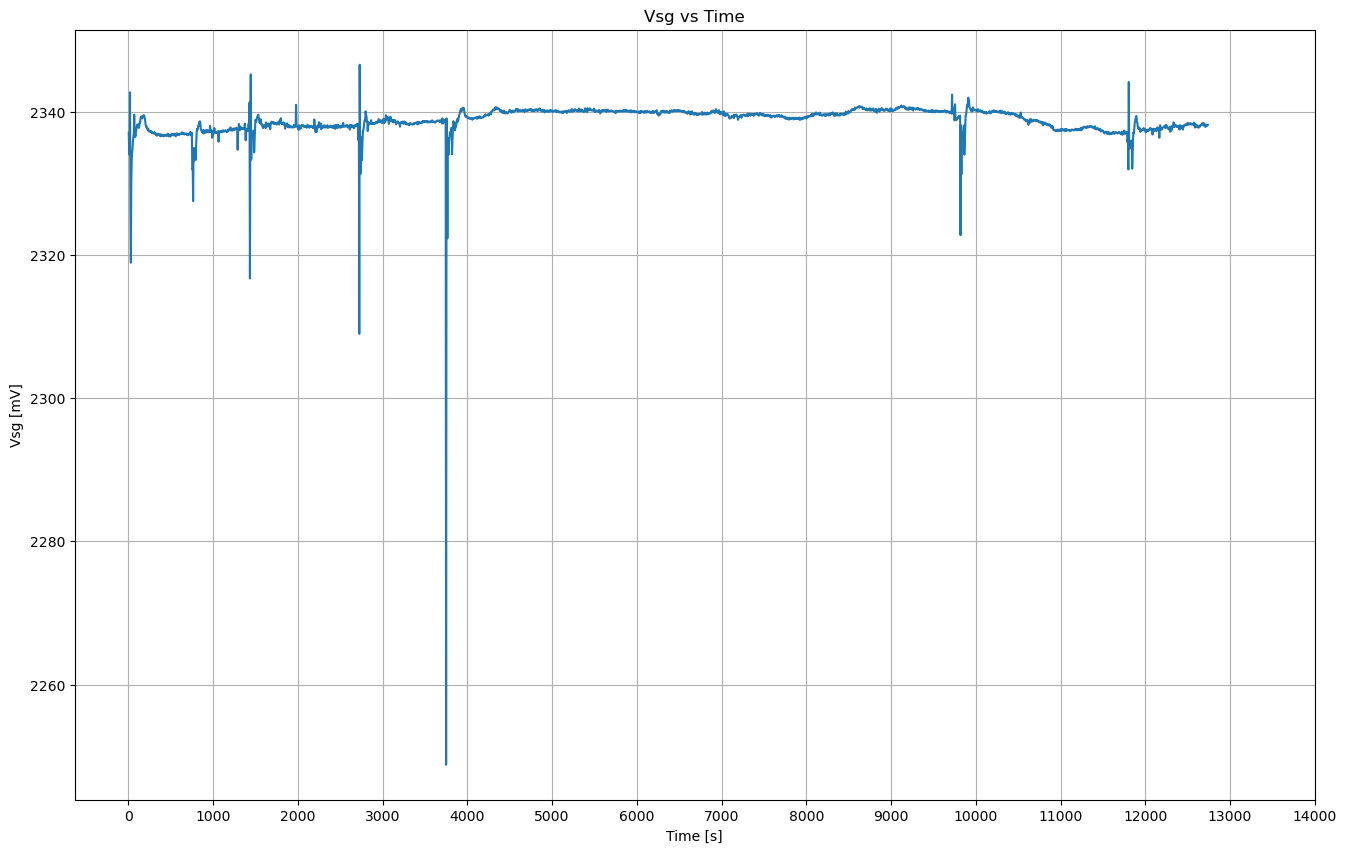

In [6]:
#Plot the data

plt.figure(figsize=(16, 10))
plt.plot(df['Time'], df['Vsg [mV]'])
plt.xlabel('Time [s]')
plt.ylabel('Vsg [mV]')
plt.title('Vsg vs Time')
plt.grid()
plt.xticks(range(0, 14001, 1000))

plt.show()




PBS + Serum (210-720): df_batch shape = (102, 2)
PBS + Serum (210-720): df_clean shape = (95, 2)
300 uM (850-1420): df_batch shape = (114, 2)
300 uM (850-1420): df_clean shape = (107, 2)
200 uM (1540-2700): df_batch shape = (232, 2)
200 uM (1540-2700): df_clean shape = (222, 2)
100 uM (2810-3775): df_batch shape = (193, 2)
100 uM (2810-3775): df_clean shape = (182, 2)
PBS + Serum (3875-9825): df_batch shape = (1190, 2)
PBS + Serum (3875-9825): df_clean shape = (1183, 2)
300 uM (9920-11780): df_batch shape = (372, 2)
300 uM (9920-11780): df_clean shape = (372, 2)
200 uM (11900-12740): df_batch shape = (168, 2)
200 uM (11900-12740): df_clean shape = (167, 2)
Number of cleaned datasets: 7


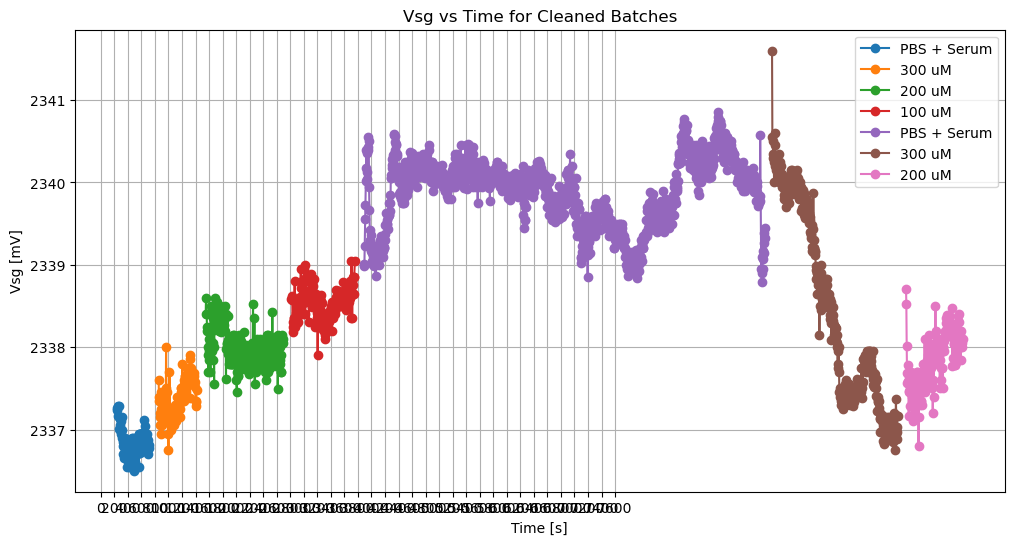

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is already loaded and has columns 'Time' and 'Vsg [mV]'
# Define the time intervals for each batch
time_intervals = [
    (210, 720),
    (850, 1420),
    (1540, 2700),
    (2810, 3775),
    (3875, 9825),
    (9920, 11780),
    (11900, 12740)
]

# Name the batches
batch_names = [
    'PBS + Serum',
    '300 uM',
    '200 uM',
    '100 uM',
    'PBS + Serum',
    '300 uM',
    '200 uM'  
]

# Ensure the number of intervals matches the number of batch names
assert len(time_intervals) == len(batch_names), "Number of time intervals and batch names must match"

# List to store cleaned datasets
cleaned_datasets = []

# Loop through each time interval and process the data
for interval, name in zip(time_intervals, batch_names):
    start_time, end_time = interval
    df_batch = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]
    
    # Debugging: Print the shape of df_batch to ensure it has data
    print(f'{name} ({start_time}-{end_time}): df_batch shape = {df_batch.shape}')
    
    # Remove outliers based on the 'Vsg [mV]' column
    if df_batch.empty:
        print(f'No data in {name}')
        continue
    
    Q1 = df_batch['Vsg [mV]'].quantile(0.25)
    Q3 = df_batch['Vsg [mV]'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_clean = df_batch[(df_batch['Vsg [mV]'] >= lower_bound) & (df_batch['Vsg [mV]'] <= upper_bound)]
    
    # Debugging: Print the shape of df_clean to ensure it has data
    print(f'{name} ({start_time}-{end_time}): df_clean shape = {df_clean.shape}')
    
    # Append the cleaned DataFrame to the list
    cleaned_datasets.append(df_clean)

# Debugging: Check the number of cleaned datasets
print(f'Number of cleaned datasets: {len(cleaned_datasets)}')

# Plot the cleaned data
plt.figure(figsize=(12, 6))
for i, (df_clean, name) in enumerate(zip(cleaned_datasets, batch_names)):
    if not df_clean.empty:
        plt.plot(df_clean['Time'], df_clean['Vsg [mV]'], marker='o', linestyle='-', label=name)
    else:
        print(f'{name} is empty and will not be plotted.')

plt.xlabel('Time [s]')
plt.ylabel('Vsg [mV]')
plt.title('Vsg vs Time for Cleaned Batches')
plt.grid()
plt.legend()
plt.xticks(range(0, 7601, 200))

plt.show()


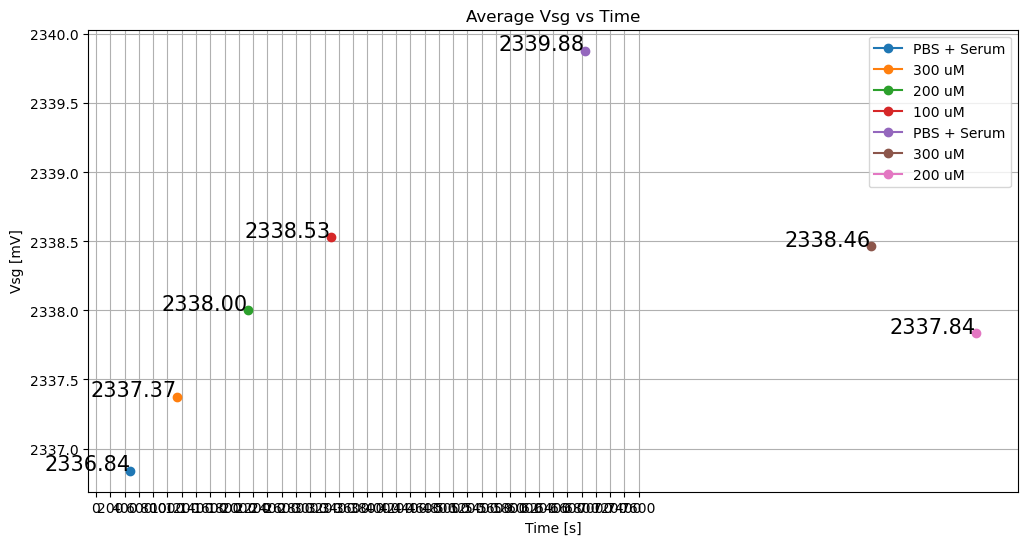

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is already loaded and cleaned_datasets is already created

# Calculate average values
average_values = []
for i, (df_clean, name) in enumerate(zip(cleaned_datasets, batch_names)):
    if not df_clean.empty:
        avg_time = df_clean['Time'].mean()
        avg_vsg = df_clean['Vsg [mV]'].mean()
        average_values.append((avg_time, avg_vsg, name))
    else:
        print(f'{name} is empty and will not be included in the average calculation.')

# Convert the list of tuples to a DataFrame
df_average = pd.DataFrame(average_values, columns=['Time', 'Vsg [mV]', 'Batch Name'])

# Plot the average values
plt.figure(figsize=(12, 6))
for _, row in df_average.iterrows():
    plt.plot(row['Time'], row['Vsg [mV]'], marker='o', linestyle='-', label=row['Batch Name'])
    # Annotate each point with its average value
    plt.text(row['Time'], row['Vsg [mV]'], f'{row["Vsg [mV]"]:.2f}', fontsize=15, ha='right')

plt.xlabel('Time [s]')
plt.ylabel('Vsg [mV]')
plt.title('Average Vsg vs Time')
plt.grid()
plt.legend()
plt.xticks(range(0, 7601, 200))

plt.show()
